In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
# import pandas_datareader as pdr
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
import tensorflow as tf

In [4]:
import FinanceDataReader as fdr

## Ⅰ. 시간다루기

In [ ]:
# 문제 1 : string형태의 변수인 datetime_str = '2025-05-29 12:23:56'을 datetime형태로 바꾸어라
# 문제 2 : datetime형태의 변수인 datetime_dt = '2025-05-29 12:23:56'을 str형태로 바꾸어라
# 문제 3 : datetime에서 년,월,일,시간,분,초를 추출하라

### (1) str -> datetime
> strptime : STRing Parse TIME

#### 1) datetime

In [ ]:
format        = "%Y-%m-%d %H:%M:%S"
datetime_str  = '2025-05-29 12:23:56'
datetime_dt   = datetime.strptime(datetime_str,format)
datetime_dt

datetime.datetime(2025, 5, 29, 12, 23, 56)

#### 2) pandas

In [ ]:
dates = pd.date_range('2025-06-01', '2025-06-07')
df = pd.DataFrame({'datetime': dates})

In [ ]:
# str -> datetime추가해야 함
dates = pd.date_range('2025-06-01', '2025-06-07')
date_str = [x.strftime("%Y-%m-%d") for x in dates]
df = pd.DataFrame({'datetime': date_str})

df['date_str'] = pd.to_datetime(df['datetime'],format = "%Y-%m-%d")
df

,datetime,date_str
0,2025-06-01,2025-06-01
1,2025-06-02,2025-06-02
2,2025-06-03,2025-06-03
3,2025-06-04,2025-06-04
4,2025-06-05,2025-06-05
5,2025-06-06,2025-06-06
6,2025-06-07,2025-06-07


### (2) datetime -> str
* > strftime : STRing Format TIME

#### 1) datetime

In [ ]:
datetime_string = datetime_dt.strftime("%Y-%m-%d %H:%M:%S")
datetime_string

'2025-05-29 12:23:56'

In [ ]:
datetime_string = datetime_dt.strftime("%Y-%m")
datetime_string

'2025-05'

#### 2) pandas

In [ ]:
df = pd.DataFrame({'datetime': pd.to_datetime(['2025-06-26 15:45:30', '2025-07-01 09:12:05'])})

# 날짜만
df['datetime_date_str'] = df['datetime'].dt.strftime("%Y-%m-%d")
# 시간만
df['datetime_date_time'] = df['datetime'].dt.strftime("%H:%M:%S")
df

,datetime,datetime_date_str,datetime_date_time
0,2025-06-26 15:45:30,2025-06-26,15:45:30
1,2025-07-01 09:12:05,2025-07-01,09:12:05


In [ ]:
# str -> time변환
# 2. 날짜만 (%Y-%m-%d 형태)
df['date_str'] = df['datetime'].dt.strftime('%Y-%m-%d')  # 예: '2025-06-26'

# 3. 시간만 (%H:%M:%S 형태)
df['time_str'] = df['datetime'].dt.strftime('%H:%M:%S')  # 예: '15:45:30'
df

,datetime,date_str,time_str
0,2025-06-26 15:45:30,2025-06-26,15:45:30
1,2025-07-01 09:12:05,2025-07-01,09:12:05


### (3) datetime에서 요소추출

#### 1) datetime

In [ ]:
print(datetime_dt.year)
print(datetime_dt.month)
print(datetime_dt.day)
print(datetime_dt.hour)
print(datetime_dt.minute)
print(datetime_dt.second)
print(datetime_dt.date())
print(datetime_dt.time())
print(datetime_dt.weekday())    # 요일을 숫자로 출력 : > 0 월, 1 화, 2 수 3 목 4 금 5 토 6 일
print(datetime_dt.isoweekday())    # 요일을 숫자로 출력 : > 1 월, 2 화, 3 수 4 목 5 금 6 토 7 일


2025
5
29
12
23
56
2025-05-29
12:23:56
3
4


In [ ]:
# 오늘날짜
datetime.now()

datetime.datetime(2025, 6, 26, 17, 31, 1, 654575)

In [ ]:
# 주간, 날짜 추출
datetime.now().isocalendar()
#  --> datetime.IsoCalendarDate(year=2022, week=5, weekday=4) : 5번째 주 4번째 날
#  isocalender()로 추출한 값의 개별정보 추출
print(datetime.now().isocalendar().year)
print(datetime.now().isocalendar().week)
print(datetime.now().isocalendar().weekday)

2025
26
4


#### 2) pandas

In [ ]:
df = pd.DataFrame({
    'datetime': pd.to_datetime(['2025-06-26 15:45:30', '2025-07-01 09:12:05'])
})

# 1. 연, 월, 일, 시, 분, 초 추출
df['year']      = df['datetime'].dt.year       # 연 (예: 2025)
df['month']     = df['datetime'].dt.month      # 월 (예: 6)
df['day']       = df['datetime'].dt.day        # 일 (예: 26)
df['hour']      = df['datetime'].dt.hour       # 시 (예: 15)
df['minute']    = df['datetime'].dt.minute     # 분 (예: 45)
df['second']    = df['datetime'].dt.second     # 초 (예: 30)
df['요일_숫자']  = df['datetime'].dt.weekday     # 요일(숫자형: 0=월 ~ 6=일)
df['요일_이름']  = df['datetime'].dt.day_name()    # 요일(이름형: Monday ~ Sunday)
df['day_of_week']    = df['datetime'].dt.day_of_week        # 주간의 일자
df['day_of_year']    = df['datetime'].dt.day_of_year        # 주간의 일자
df['day_in_month']          = df['datetime'].dt.days_in_month     # 해당 월의 날짜 수
df['day_of_iso_year']       = df['datetime'].dt.isocalendar().year        # 주간의 일자
df['day_of_iso_week']       = df['datetime'].dt.isocalendar().week        # 주간의 일자
df['day_of_iso_weekday']    = df['datetime'].dt.isocalendar().weekday        # 주간의 일자
df

AttributeError: 'DataFrame' object has no attribute 'weekday'

#### 3) df의 개별요소에서 정보추출

In [ ]:
df = pd.DataFrame({
    'datetime': pd.to_datetime(['2025-06-26 15:45:30', '2025-07-01 09:12:05'])
})

# 개별 요소에서 추출 (Timestamp 객체)
ts = df.loc[0, 'datetime']
print(ts.year, ts.month, ts.day)        # 2025 6 26
print(ts.strftime('%H:%M:%S'))          # '15:45:30'
print(ts.weekday())                     # 3
print(ts.day_name())                    # 'Thursday'

2025 6 26
15:45:30
3
Thursday


### (4) 요일추출

#### 1) datetime

In [ ]:
base_date = datetime(2025, 6, 26)  # 기준날짜 목요일
# datetime에서 특정 일자를 기준으로 아래의 답을 추출
    # 문제 : 요일을 숫자로 추출
    # 문제 : 요일의 Fullname을 영어로 추출
    # 문제 : 요일의 약칭 name을 영어로 추출
    # 문제 : 요일을 한글로 Matching

In [ ]:
# 1. datetime 객체에서 요일 숫자 추출 (0 = 월요일, 6 = 일요일)
print(base_date.weekday())        # 결과: 3

# 2. datetime 객체에서 요일 이름 추출 (전체 이름)
print(base_date.strftime("%A"))   # 결과: Thursday

# 3.  datetime 객체에서 월 이름 추출 (전체 영문)
print(base_date.strftime("%B"))   # 결과: June

# 3. datetime 객체에서 요일 이름 추출 (약어)
print(base_date.strftime("%a"))   # 결과: Thu

# 4. 요일을 한글로 표현하고 싶을 때 (직접 매핑)
korean_weekdays = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
print(korean_weekdays[base_date.weekday()])  # 결과: 목요일

3
Thursday
June
Thu
목요일


#### 2) pandas

In [ ]:
# 7. pandas Series에서 요일 추출 (벡터 연산 가능)
dates = pd.date_range('2025-06-01', '2025-06-07')
df = pd.DataFrame({'date': dates})
df['weekday_num'] = df['date'].dt.weekday           # 0~6
df['weekday_name'] = df['date'].dt.day_name()       # Monday ~ Sunday
df

,date,weekday_num,weekday_name
0,2025-06-01,6,Sunday
1,2025-06-02,0,Monday
2,2025-06-03,1,Tuesday
3,2025-06-04,2,Wednesday
4,2025-06-05,3,Thursday
5,2025-06-06,4,Friday
6,2025-06-07,5,Saturday


#### 3) df의 개별요소에서 정보추출

In [ ]:
ts = pd.Timestamp('2025-06-26')  # 기준날짜 목요일
# datetime에서 특정 일자를 기준으로 아래의 답을 추출
    # 문제 : 요일을 숫자로 추출
    # 문제 : 요일의 Fullname을 영어로 추출
    # 문제 : 요일의 약칭 name을 영어로 추출
    # 문제 : 요일을 한글로 Matching

In [ ]:
# 6. pandas Timestamp에서 요일 속성 추출 (datetime처럼 동작)
print(ts.weekday())       # 결과: 3
print(ts.day_name())      # 결과: Thursday
print(ts.strftime('%A'))  # 결과: Thursday

### (5) 특정 기간 동안의 날짜 생성

In [ ]:
# 전체 날짜 기준 생성
date_range = pd.date_range('2025-03-31','2025-04-10',freq = 'D')
date_range

DatetimeIndex(['2025-03-31', '2025-04-01', '2025-04-02', '2025-04-03',
               '2025-04-04', '2025-04-05', '2025-04-06', '2025-04-07',
               '2025-04-08', '2025-04-09', '2025-04-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# Business day기준 생성
bdate_range = pd.bdate_range('2025-03-31','2025-04-10',freq = 'D')
bdate_range

DatetimeIndex(['2025-03-31', '2025-04-01', '2025-04-02', '2025-04-03',
               '2025-04-04', '2025-04-05', '2025-04-06', '2025-04-07',
               '2025-04-08', '2025-04-09', '2025-04-10'],
              dtype='datetime64[ns]', freq='D')

| 파라미터            | 설명                                                             |
| --------------- | -------------------------------------------------------------- |
| `start` / `end` | 시작일, 종료일                                                       |
| `periods`       | 생성할 날짜 개수 지정 (end 대신 사용 가능)                                    |
| `freq`          | 간격 (일 `'D'`, 월 `'M'`, 주 `'W'`, 시간 `'H'`, 초 `'S'`, 영업일 `'B'` 등) |

※ freq에 들어갈 항목 : https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases

---

### (6) 일자/시간 차이 계산하기

### (7) PeriodIndex와 DatetimeIndex의 차이

<!DOCTYPE html>
<html lang="ko">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>pd.period_range vs pd.date_range 차이점</title>
    <style>
        table {
            width: 100%;
            border-collapse: collapse;
            margin: 20px 0;
            font-family: Arial, sans-serif;
        }
        th, td {
            border: 1px solid #ddd;
            padding: 10px;
            text-align: left;
            vertical-align: top; /* 내용이 많아도 위로 정렬 */
        }
        th {
            background-color: #f2f2f2;
            font-weight: bold;
        }
        tr:nth-child(even) {
            background-color: #f9f9f9;
        }
        h2 {
            font-family: Arial, sans-serif;
            color: #333;
        }
    </style>
</head>
<body>
    <table>
        <thead>
            <tr>
                <th>특징</th>
                <th>`pd.period_range`</th>
                <th>`pd.date_range`</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td><strong>생성 객체 타입</strong></td>
                <td><code>PeriodIndex</code> (<code>Period</code> 객체들로 구성)</td>
                <td><code>DatetimeIndex</code> (<code>Timestamp</code> 객체들로 구성)</td>
            </tr>
            <tr>
                <td><strong>기본 개념</strong></td>
                <td><strong>기간(Period)</strong>: 특정 시간 간격 전체를 의미함.</td>
                <td><strong>특정 시점(Timestamp)</strong>: 정확한 날짜와 시간 포인트를 의미함.</td>
            </tr>
            <tr>
                <td><strong><code>freq='M'</code> 해석</strong></td>
                <td>각 월의 <strong>기간 자체</strong>를 나타냄<br>(예: <code>2025-01</code> = 2025년 1월 1일 00:00:00 ~ 2025년 1월 31일 23:59:59)</td>
                <td>각 월의 <strong>마지막 날 시점</strong>을 나타냄<br>(예: <code>2025-01</code>에 해당하는 <code>2025-01-31 00:00:00</code>)</td>
            </tr>
            <tr>
                <td><strong><code>start</code> 인자 해석</strong></td>
                <td><code>'YYYY-MM'</code> 형식으로 주어지면 해당 월의 시작 Period로 간주 (예: <code>'2025-01'</code>은 2025년 1월 기간의 시작)</td>
                <td><code>'YYYY-MM'</code> 형식으로 주어지면 해당 월의 첫째 날 00:00:00 시점으로 간주 (예: <code>'2025-01'</code>은 <code>2025-01-01 00:00:00</code>)</td>
            </tr>
            <tr>
                <td><strong><code>end</code> / <code>stop</code> 인자 해석</strong></td>
                <td><code>stop</code> 인자에 명시된 기간은 <strong>포함되지 않음</strong><br>(예: <code>stop='2025-05'</code>는 2025년 4월까지의 Period를 생성)</td>
                <td><code>stop</code> 인자에 명시된 날짜 시점은 <strong>포함되지 않음</strong><br>(예: <code>stop='2025-05'</code>는 2025년 5월 1일보다 이전 시점의 월말까지만 생성)</td>
            </tr>
            <tr>
                <td><strong>주요 사용처</strong></td>
                <td>월별/분기별/연간 <strong>집계 데이터</strong><br>(예: 월별 매출액, 분기별 생산량, 연간 강수량)</td>
                <td>특정 시점의 <strong>측정값 또는 이벤트</strong><br>(예: 주식 종가, 센서 데이터 측정 시간, 특정 사건 발생 일시)</td>
            </tr>
            <tr>
                <td><strong>예시 (given)</strong></td>
                <td><code>pd.period_range('2025-01', '2025-05', freq='M')</code> <br>➡️ <code>PeriodIndex(['2025-01', '2025-02', '2025-03', '2025-04'])</code></td>
                <td><code>pd.date_range('2025-01', '2025-05', freq='M')</code> <br>➡️ <code>DatetimeIndex(['2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30'])</code></td>
            </tr>
        </tbody>
    </table>

</body>
</html>

## ※ numpy

In [ ]:
# 문제 4 : numpy를 이용하여 '2025-05-30'를 datetime형태로 만들어라(datetime64함수를 이용)
# 문제 5 : array함수를 이용하여 '2025-05-30'를 datetime형태로 만들어라(연,월,일 단위로 표시)
# 문제 6 : arange로 '2025-03-08','2025-05-30'날짜 사이에 기간을 생성하고 날짜수가 몇개인 지 출력해줘

#### 1) datetime64생성

#### 2) arange, array로 데이터 생성

In [ ]:
np.array(['2007-07-13','2008-07-13','2017-07-13'],dtype = 'datetime64[D]')

array(['2007-07-13', '2008-07-13', '2017-07-13'], dtype='datetime64[D]')

In [ ]:
np.array(['2007-07-13','2008-07-13','2017-07-13'],dtype = 'datetime64[M]')

array(['2007-07', '2008-07', '2017-07'], dtype='datetime64[M]')

In [ ]:
np.array(['2007-07-13','2008-07-13','2017-07-13'],dtype = 'datetime64[Y]')

array(['2007', '2008', '2017'], dtype='datetime64[Y]')

#### 3) 시간차이 계산

In [ ]:
np.datetime64('2025-05-30') - np.datetime64('2025-03-08')

np.timedelta64(83,'D')

In [ ]:
np.datetime64('2025') - np.datetime64('2025-03')

np.timedelta64(-2,'M')

In [ ]:
np.datetime64('2025-05-30') - np.datetime64('2025-03')

np.timedelta64(90,'D')

#### 1)

In [ ]:
pd.Period('2025-01')

Period('2025-01', 'M')

In [ ]:
pd.Period('2025-05',freq = 'D')

Period('2025-05-01', 'D')

In [ ]:
pd.period_range('2025-01','2025-05',freq = 'M')

PeriodIndex(['2025-01', '2025-02', '2025-03', '2025-04', '2025-05'], dtype='period[M]')

In [ ]:
# Timestamp는 한 시점을 뜻하고 Period는 1일의 시작 시점부터 종료 시점까지의 범위를 포괄한다
p = pd.Period('2025-05-30')
test = pd.Timestamp('2025-05-30 22:11')
p.start_time < test < p.end_time

True

In [ ]:
pd.date_range('2025-01','2025-02',freq = 'B')

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-06',
               '2025-01-07', '2025-01-08', '2025-01-09', '2025-01-10',
               '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16',
               '2025-01-17', '2025-01-20', '2025-01-21', '2025-01-22',
               '2025-01-23', '2025-01-24', '2025-01-27', '2025-01-28',
               '2025-01-29', '2025-01-30', '2025-01-31'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
pd.date_range('2025-01','2025-02',freq = 'W')

DatetimeIndex(['2025-01-05', '2025-01-12', '2025-01-19', '2025-01-26'], dtype='datetime64[ns]', freq='W-SUN')

In [ ]:
pd.date_range('2025-01','2025-02',freq = 'W-MON')

DatetimeIndex(['2025-01-06', '2025-01-13', '2025-01-20', '2025-01-27'], dtype='datetime64[ns]', freq='W-MON')

## Ⅱ. 데이터 불러오기


### (1) FinanceDataReader
* https://github.com/FinanceData/FinanceDataReader/wiki/

In [5]:
path = '/content/drive/MyDrive/Colab Notebooks/1. 책 첨부파일/1. 퀀트전략을 위한 인공지능 트레이딩/퀀트전략을 위한 인공지능 트레이딩/data/'
file = 'us_etf_data/AAPL.csv'
aapl = pd.read_csv(path+file,parse_dates= ['Date'],index_col = 'Date')
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0


In [6]:
aapl[aapl.isin([np.nan,np.inf,-np.inf]).any(axis = 1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-08-10,NaN,NaN,NaN,NaN,NaN,NaN


#### 1) 종목list전체 가져오기
* fdr.StockListing('S&P500')

In [7]:
import FinanceDataReader as fdr
df_spx = fdr.StockListing('S&P500')
df_spx.head()

,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Biotechnology
4,ACN,Accenture,Information Technology,IT Consulting & Other Services


In [10]:
df_krx = fdr.StockListing('KRX')
df_krx = df_krx.drop(columns = ['ISU_CD','ChangeCode','MarketId'])
df_krx.head()

,Code,Name,Market,Dept,Close,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks
0,005930,삼성전자,KOSPI,,59800,-1000,-1.64,61200,61200,59800,17110294,1030779273850,353994347735600,5919637922
1,000660,SK하이닉스,KOSPI,,292000,8000,2.82,288500,294500,286000,4375298,1270954675000,212576690580000,728002365
2,207940,삼성바이오로직스,KOSPI,,992000,-4000,-0.40,1001000,1001000,992000,44549,44337303500,70604608000000,71174000
3,373220,LG에너지솔루션,KOSPI,,297000,9000,3.13,290000,297500,290000,209821,62004920750,69498000000000,234000000
4,034020,두산에너빌리티,KOSPI,,68400,2600,3.95,70400,72200,66800,12295863,850040300500,43814382386400,640561146


#### 2) 특정종목의 일정기간 주가 history가져오기
* fdr.DataReader('071050','2024-01-01','2024-12-31')

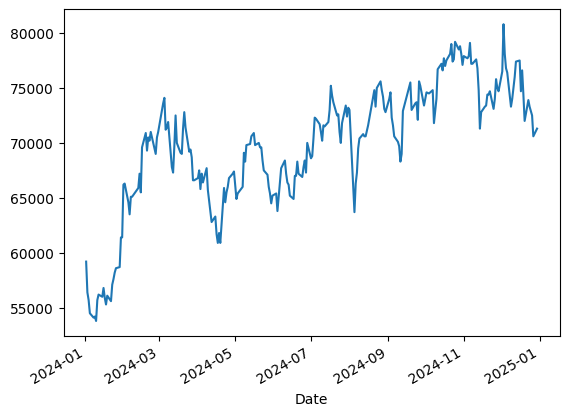

In [12]:
df = fdr.DataReader('071050','2024-01-01','2024-12-31')   # 한국금융지주
df['Close'].plot()
plt.show()

### (2) Investing.com

In [ ]:
aapl = aapl.drop(index = '1981-08-10')

In [ ]:
# shift
aapl['Close_lag_1'] = aapl['Close'].shift(1)
aapl

,Open,High,Low,Close,Adj Close,Volume,Close_lag_1
Date,,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0,NaN
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0,0.513393
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0,0.486607
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0,0.450893
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0,0.462054
...,...,...,...,...,...,...,...
2019-06-18,196.050003,200.289993,195.210007,198.449997,198.449997,26551000.0,193.889999
2019-06-19,199.679993,199.880005,197.309998,197.869995,197.869995,21124200.0,198.449997
2019-06-20,200.369995,200.610001,198.029999,199.460007,199.460007,21514000.0,197.869995


In [ ]:
# pct_change()
aapl['pct_change'] = aapl['Close'].pct_change()      # (현재 값 - 이전값)/이전값
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,Close_lag_1,pct_change
Date,,,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0,NaN,NaN
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0,0.513393,-0.052174
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0,0.486607,-0.073394
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0,0.450893,0.024753
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0,0.462054,0.028984


In [ ]:
# diff
aapl['Close_diff'] = aapl['Close'].diff()     # 현재 값 - 이전값
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,Close_lag_1,pct_change,Close_diff
Date,,,,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0,NaN,NaN,NaN
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0,0.513393,-0.052174,-0.026786
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0,0.486607,-0.073394,-0.035714
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0,0.450893,0.024753,0.011161
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0,0.462054,0.028984,0.013392


In [ ]:
# rolling(window = n).mean() 등 : 일정 구간의 데이터를 가지고 평균,최대,최소값등을 구하는 함수
aapl['5MA'] = aapl['Close'].rolling(5).mean()
aapl.head(10)

,Open,High,Low,Close,Adj Close,Volume,Close_lag_1,pct_change,Close_diff,5MA
Date,,,,,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0,NaN,NaN,NaN,NaN
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0,0.513393,-0.052174,-0.026786,NaN
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0,0.486607,-0.073394,-0.035714,NaN
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0,0.450893,0.024753,0.011161,NaN
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0,0.462054,0.028984,0.013392,0.477679
1980-12-19,0.504464,0.506696,0.504464,0.504464,0.403385,12157600.0,0.475446,0.061033,0.029018,0.475893
1980-12-22,0.529018,0.531250,0.529018,0.529018,0.423019,9340800.0,0.504464,0.048673,0.024554,0.484375
1980-12-23,0.551339,0.553571,0.551339,0.551339,0.440868,11737600.0,0.529018,0.042193,0.022321,0.504464
1980-12-24,0.580357,0.582589,0.580357,0.580357,0.464072,12000800.0,0.551339,0.052632,0.029018,0.528125


In [ ]:
# resample
idx = pd.date_range(start = '2024-01-01',end = '2024-12-31',freq = 'B')
series = pd.Series(range(len(idx)),index = idx)
series.resample(rule = 'ME').sum()

,0
2024-01-31,253
2024-02-29,693
2024-03-31,1134
2024-04-30,1661
2024-05-31,2254
2024-06-30,2390
2024-07-31,3243
2024-08-31,3597
2024-09-30,3885
2024-10-31,4761


In [ ]:
# last() : 말일자 확인, first() : 첫일자 확인
series.resample(rule = 'ME').last()

,0
2024-01-31,22
2024-02-29,43
2024-03-31,64
2024-04-30,86
2024-05-31,109
2024-06-30,129
2024-07-31,152
2024-08-31,174
2024-09-30,195
2024-10-31,218


## Ⅲ. 투자전략

### (1) Buy & Hold

In [17]:
amzn = fdr.DataReader('AMZN','2020-01-01','2025-05-30')

In [18]:
amzn['daily_rtn'] = amzn['Adj Close'].pct_change()
amzn['cummulative_rtn'] = (1+amzn['daily_rtn']).cumprod()

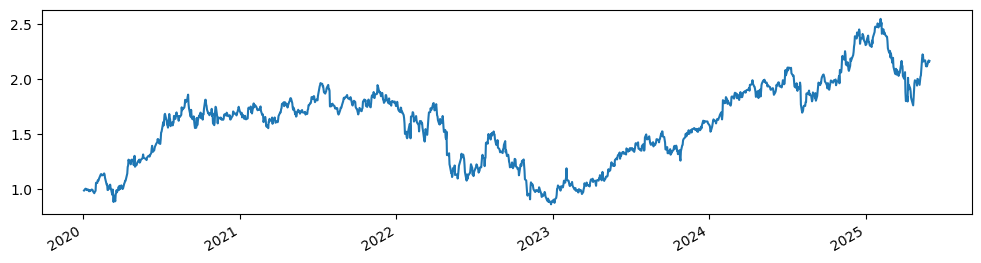

In [19]:
amzn['cummulative_rtn'].plot(figsize = (12,3))
plt.show()

### ※ searchsorted : 삽입될 위치를 찾는 함수
* searchsorted(start_date)는 정렬된 인덱스에서 start_date가 삽입될 수 있는 위치를 반환 -> start_date가 정확히 존재하면 그 위치를 반환하고,존재하지 않으면 그 이후의 가장 가까운 날짜 인덱스 위치를 알려줌
* 날짜형에만 국한되지 않고, 정렬된 1차원 배열(Series, Index, ndarray 등)이라면 어떤 타입에도 동작
* 단, 입력된 시퀀스가 정렬되어 있어야 의미 있는 결과가 나옴

In [ ]:
base_date = pd.Timestamp('2021-01-01')
start_date = amzn.iloc[amzn.index.searchsorted(base_date),:].name

누적수익 :  1.2910190425178332


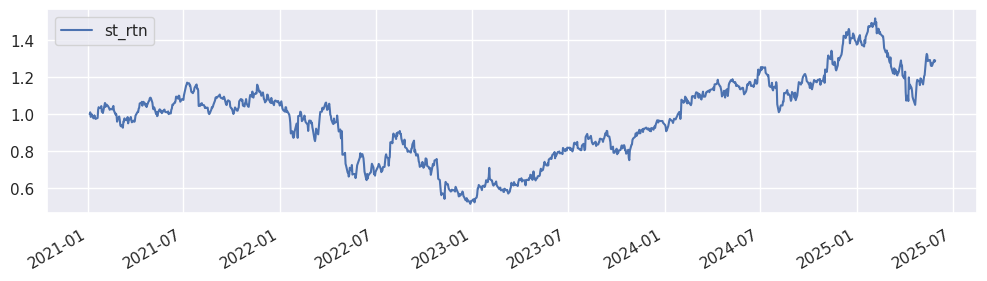

In [ ]:
tmp_df = amzn.loc[start_date:,['st_rtn']] / amzn.loc[start_date,['st_rtn']]
# amzn.loc[base_date:, 'st_rtn'] => Series	반환 vs amzn.loc[base_date:,['st_rtn']] => df반환
last_date = tmp_df.index[-1]
print('누적수익 : ',tmp_df.loc[last_date,'st_rtn'])
tmp_df.plot(figsize = (12,3))
plt.show()

#### 1) 연평균 복리 수익률(CAGR)계산방식

$$
\text{CAGR} = \left( \frac{\text{Ending Value}}{\text{Beginning Value}} \right)^{\frac{1}{n}} - 1
$$


In [ ]:
def cagr(begin_value, end_value, years):
    return (end_value / begin_value) ** (1 / years) - 1

$$
\text{years} = \frac{(\text{end\_date} - \text{start\_date}).\text{days}}{365.25}
$$

In [ ]:
def cagr(begin_date, end_date, df, price_col='Adj Close'):
    stamp_start = pd.Timestamp(begin_date)
    stamp_end = pd.Timestamp(end_date)

    # 시작/종료 인덱스 찾기 (정렬된 index 기준)
    start_idx = df.index.searchsorted(stamp_start)
    end_idx = df.index.searchsorted(stamp_end)

    # index 범위 초과 예외 처리
    if start_idx >= len(df) or end_idx >= len(df):
        raise ValueError("시작일 또는 종료일이 데이터 범위를 벗어났습니다.")

    # 실제 날짜 및 값 추출
    start_date = df.index[start_idx]
    end_date = df.index[end_idx]

    if end_date <= start_date:
        raise ValueError("종료일은 시작일보다 이후여야 합니다.")

    start_value = df.iloc[start_idx][price_col]
    end_value = df.iloc[end_idx][price_col]

    if pd.isna(start_value) or pd.isna(end_value):
        raise ValueError("시작값 또는 종료값이 NaN입니다.")
    if start_value <= 0:
        raise ValueError("시작값이 0 이하입니다.")

    years = (end_date - start_date).days / 365.25
    if years <= 0:
        raise ValueError("연 기간이 0 이하입니다.")

    cagr = (end_value / start_value) ** (1 / years) - 1

    # print(f"▶ 시작일: {start_date.date()} | 시작값: {start_value}")
    # print(f"▶ 종료일: {end_date.date()} | 종료값: {end_value}")
    # print(f"▶ 기간: {years:.4f}년 | CAGR: {cagr:.4%}")

    return cagr

#### 2) MDD(최대낙폭)

$$
\text{MDD(최대낙폭)} = \left( \frac{\text{관측기간 최저점 가격 - 관측기간 최저점 가격}}{\text{관측기간 최고점 가격}} \right)
$$

<Axes: >

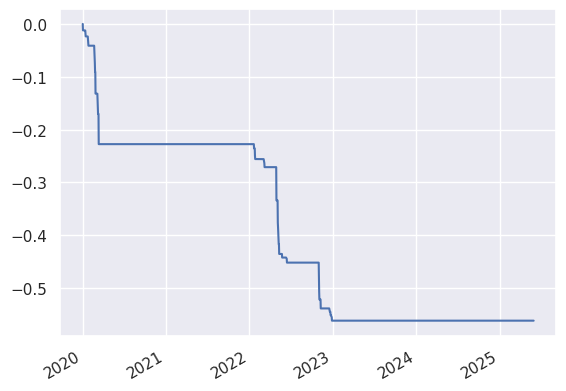

In [ ]:
historical_max = amzn['Adj Close'].cummax()
daily_drawdown = amzn['Adj Close'] / historical_max -1
historical_dd = daily_drawdown.cummin()
historical_dd.plot()

#### 3) 변동성(Vol)

In [ ]:
vol = np.std(amzn['daily_rtn'])*np.sqrt(252)
vol

np.float64(0.36318437269353976)

#### 4) 샤프지수

$$
\text{Sharpe Ratio} = \frac{\text{Mean}(\text{Return}_{\text{포트폴리오}} - \text{Return}_{\text{무위험이자율}})}{\text{StdDev}(\text{Return}_{\text{포트폴리오}})}
$$


### (2) 전통 퀀트 투자 전략

#### 1) 평균회귀전략

In [ ]:
def bband(code, start=None, end=None, periods=20, multiple=2, col='Adj Close'):
    # 시작일 기본값
    # if start is None:
    #     start = pd.Timestamp("2020-01-01")

    # 종료일 기본값: 오늘 날짜
    if end is None:
        end = pd.Timestamp.today().normalize()  # 시간 00:00:00으로 고정
    price_df = fdr.DataReader(code,start,end)
    price_df['20MA']  = price_df[col].rolling(periods).mean()
    price_df['sigma'] = price_df[col].rolling(periods).std()
    price_df['ub'] = price_df['20MA'] + multiple*price_df['sigma']
    price_df['lb'] = price_df['20MA'] - multiple*price_df['sigma']
    price_df = price_df.dropna(subset = '20MA')

    return price_df

In [ ]:
bband('SPY')

,Open,High,Low,Close,Volume,Adj Close,20MA,sigma,ub,lb
1993-02-26,44.437500,44.437500,44.187500,44.406250,66200,24.713392,24.639475,0.314566,25.268607,24.010343
1993-03-01,44.562500,44.562500,44.218750,44.281250,66500,24.643820,24.649040,0.311476,25.271991,24.026088
1993-03-02,44.312500,44.937500,44.250000,44.937500,182400,25.009062,24.668172,0.321600,25.311372,24.024971
1993-03-03,45.000000,45.156250,44.937500,45.125000,280100,25.113396,24.689911,0.336685,25.363280,24.016542
1993-03-04,45.187500,45.187500,44.875000,44.875000,89500,24.974253,24.691650,0.338128,25.367907,24.015394
...,...,...,...,...,...,...,...,...,...,...
2025-05-23,575.979980,581.809998,575.599976,579.109985,76029000,579.109985,573.632001,15.146444,603.924889,543.339112
2025-05-27,586.070007,591.309998,578.429993,591.150024,72588500,591.150024,575.647003,14.627905,604.902813,546.391193
2025-05-28,591.559998,592.770020,586.989990,587.729980,68445500,587.729980,577.317502,13.956479,605.230459,549.404544
2025-05-29,593.059998,593.200012,586.070007,590.049988,70073800,590.049988,579.093002,13.141207,605.375417,552.810588


#### 2) 듀얼 모멘텀 전략

##

## Ⅴ. 금융에서의 머신러닝

### (1) 엠바고 작업
* 테스트셋이 두 개의 훈련 세트에 둘러써여 있고 그 사이에 마진을 만들어 데이터의 누설을 방지한다 -> mlfinlab을 사용
* 시계열 데이터, 특히 금융 시계열에서 좋은 성능을 낼 수 있는 교차 검증은 휴리스틱하게 여러 가지를 시도할 수 밖에 없다

### (2) ETFs와 거시경제 지표 데이터를 이용한 투자전략

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import glob
import os
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns; sns.set()

In [ ]:
file = 'ch06/ETFs_main.csv'
etf = pd.read_csv(path[:-5]+file,parse_dates= ['Dates'],index_col='Dates')
etf.head()

,CLOSE_SPY,OPEN,HIGH,LOW,VOLUME,CLOSE_GLD,CLOSE_FXY,CLOSE_T10Y2Y,CLOSE_TED,CLOSE_USO,CLOSE_UUP,CLOSE_VIX,CLOSE_VWO
Dates,,,,,,,,,,,,,
2007-02-20,146.04,145.56,146.20,144.0,56909500.0,65.31,83.51,2.3263,0.31,48.67,25.07,10.24,40.055
2007-02-21,145.98,145.61,146.07,145.0,63971500.0,67.28,82.90,2.3653,0.32,49.86,25.12,10.20,39.975
2007-02-22,145.87,146.05,146.42,145.0,79067398.0,67.15,82.46,2.3871,0.31,50.33,25.12,10.18,40.220
2007-02-23,145.30,145.74,145.79,145.0,71962797.0,67.72,82.78,2.3809,0.31,50.46,25.04,10.58,40.035
2007-02-26,145.17,145.83,145.95,145.0,69320062.0,68.10,83.08,2.3795,0.31,50.90,25.04,11.15,39.960


#### 1) join함수

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; text-align: center;">
  <thead>
    <tr>
      <th>항목</th>
      <th><code>concat()</code></th>
      <th><code>join()</code></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>기본 연결 축</strong></td>
      <td><strong>행(row)</strong> 기준 (<code>axis=0</code> 기본)</td>
      <td><strong>열(column)</strong> 기준 (<code>axis=1</code> 고정)</td>
    </tr>
    <tr>
      <td><strong>기준 인덱스</strong></td>
      <td>인덱스 정렬 안 함 (옵션에 따라 다름)</td>
      <td>인덱스 기준 병합 (SQL의 JOIN처럼 동작)</td>
    </tr>
    <tr>
      <td><strong>사용 대상</strong></td>
      <td>Series, DataFrame 모두 가능</td>
      <td>보통 DataFrame에 Series/DataFrame 붙일 때</td>
    </tr>
    <tr>
      <td><strong>활용 예</strong></td>
      <td>여러 df를 수직 또는 수평 병합</td>
      <td>컬럼 하나 추가하거나, SQL JOIN처럼 연결</td>
    </tr>
    <tr>
      <td><strong>merge-like 기능</strong></td>
      <td>❌ 없음</td>
      <td>✅ 가능 (<code>how=</code>으로 <code>left/right/inner/outer</code>)</td>
    </tr>
    <tr>
      <td><strong>열 이름 중복 시</strong></td>
      <td>자동 숫자 붙음 (<code>col</code>, <code>col_1</code> 등)</td>
      <td>동일한 이름 병합되거나 충돌 가능</td>
    </tr>
  </tbody>
</table>

In [ ]:
def moving_average(df, n):
    MA = pd.Series(df['CLOSE_SPY'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    df = df.join(MA)
    return df

In [ ]:
def volume_moving_average(df, n):
    VMA = pd.Series(df['VOLUME'].rolling(n, min_periods=n).mean(), name='VMA_' + str(n))
    df = df.join(VMA)
    return df

#### 2) RSI산식
$$
\begin{align*}
\Delta P_t &= P_t - P_{t-1} \\
\text{Gain}_t &= \max(\Delta P_t, 0) \\
\text{Loss}_t &= \max(-\Delta P_t, 0) \\
\text{AvgGain}_t &= \frac{1}{n} \sum_{i=t-n+1}^{t} \text{Gain}_i \\
\text{AvgLoss}_t &= \frac{1}{n} \sum_{i=t-n+1}^{t} \text{Loss}_i \\
RS_t &= \frac{\text{AvgGain}_t}{\text{AvgLoss}_t} \\
RSI_t &= 100 - \left( \frac{100}{1 + RS_t} \right)
\end{align*}
$$
※ AvgGain과 AvgLoss를 구할 때의 t는 실제 상승/하락 기간이 아니라 전체기간 (ex : 설정값 14)로 계산한다

#### 3) 지수가중이동평균 계산
<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; text-align: left; width: 100%;">
  <thead style="background-color: #f0f0f0;">
    <tr>
      <th>구분</th>
      <th>내용</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><strong>1. 실제 수식</strong></td>
      <td>
        <p>지수 이동 평균(EMA)은 다음과 같이 계산됩니다:</p>
        <pre><code>EMAₜ = α × xₜ + (1 - α) × EMAₜ₋₁</code></pre>
        <ul>
          <li><code>xₜ</code> : 현재 시점의 값</li>
          <li><code>EMAₜ₋₁</code> : 이전 시점의 EMA</li>
          <li><code>α</code> : 평활계수 (smoothing factor)</li>
        </ul>
      </td>
    </tr>
    <tr>
      <td><strong>2. 평활 계수 계산</strong></td>
      <td>
        <p>평활계수 <code>α</code>는 <code>span</code>에 따라 다음과 같이 계산됩니다:</p>
        <pre><code>α = 2 / (span + 1)</code></pre>
        <p>예: <code>span = 14</code>라면 → <code>α = 2 / (14 + 1) = 0.1333</code></p>
      </td>
    </tr>
    <tr>
      <td><strong>3. 예제 수식 흐름</strong></td>
      <td>
        <p>예를 들어, 값이 <code>[10, 12, 13, 15]</code>이고 <code>span = 3</code>인 경우:</p>
        <pre><code>α = 2 / (3 + 1) = 0.5</code></pre>
        <ul>
          <li>EMA₀ = 10 (초기값)</li>
          <li>EMA₁ = 0.5 × 12 + 0.5 × 10 = 11</li>
          <li>EMA₂ = 0.5 × 13 + 0.5 × 11 = 12</li>
          <li>EMA₃ = 0.5 × 15 + 0.5 × 12 = 13.5</li>
        </ul>
      </td>
    </tr>
  </tbody>
</table>

In [ ]:
def RSI(df, n):
    df = df.reset_index(drop=False)  # 인덱스를 정수형으로 리셋

    UpI = [0]
    DoI = [0]
    for i in range(1, len(df)):
        UpMove = df.loc[i, 'HIGH'] - df.loc[i - 1, 'HIGH']
        DoMove = df.loc[i - 1, 'LOW'] - df.loc[i, 'LOW']
        UpI.append(UpMove if UpMove > DoMove and UpMove > 0 else 0)
        DoI.append(DoMove if DoMove > UpMove and DoMove > 0 else 0)

    UpI = pd.Series(UpI)
    DoI = pd.Series(DoI)
    PosDI = UpI.ewm(span=n, min_periods=n).mean()
    NegDI = DoI.ewm(span=n, min_periods=n).mean()
    RSI = PosDI / (PosDI + NegDI)
    RSI.name = f'RSI_{n}'

    df = df.join(RSI)
    df['Dates'] = pd.to_datetime(df['Dates'], format="%Y-%m-%d")
    df = df.set_index('Dates')
    return df

In [ ]:
df = moving_average(etf,45)
df = volume_moving_average(df,45)
df = RSI(df,14)

In [ ]:
df['target'] = df['CLOSE_SPY'].pct_change()
# df['target'] = np.where(df['target']>0,1,-1)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else -1)
df['target'].value_counts()

,count
target,
1,1497
-1,1274


In [ ]:
df['target'] = df['target'].shift(-1)
df = df.dropna()
df['target'] = df['target'].astype('int64')
df.shape

(2726, 17)

In [ ]:
y_var = df['target']
x_var = df.drop(columns = ['target','OPEN','HIGH','LOW','VOLUME','CLOSE_SPY'])

In [ ]:
x_var

,CLOSE_GLD,CLOSE_FXY,CLOSE_T10Y2Y,CLOSE_TED,CLOSE_USO,CLOSE_UUP,CLOSE_VIX,CLOSE_VWO,MA_45,VMA_45,RSI_14
Dates,,,,,,,,,,,
2007-04-27,67.56,83.7300,2.4474,0.55,51.84,24.54,12.45,41.750,143.551556,1.106696e+08,0.670018
2007-04-30,67.09,83.7166,2.4361,0.57,51.24,24.49,14.22,40.935,143.601556,1.116466e+08,0.531751
2007-05-02,66.66,83.3800,2.4366,0.59,49.59,24.66,13.08,42.020,143.680667,1.121613e+08,0.554050
2007-05-03,67.49,83.1100,2.4346,0.60,49.28,24.69,13.09,42.435,143.780222,1.123421e+08,0.601028
2007-05-04,68.19,83.2300,2.4006,0.60,48.30,24.60,12.91,42.595,143.905111,1.128853e+08,0.665987
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-19,117.43,84.8300,1.7824,0.44,10.02,25.97,25.58,37.890,270.407333,1.225288e+08,0.201733
2018-12-20,119.24,85.8700,1.7807,0.48,9.72,25.77,28.38,38.180,269.767778,1.240592e+08,0.172439
2018-12-21,118.72,85.8700,1.7651,0.48,9.57,25.94,30.11,37.870,269.018889,1.274610e+08,0.142578


In [ ]:
up =df[df['target']==1]['target'].count()
total = df['target'].count()
print(f'up/down ratio = {up/total :0.2f}')

up/down ratio = 0.54


In [ ]:
X_train,X_test, y_train, y_test = train_test_split(x_var,y_var,test_size = 0.3,shuffle = False,random_state = 3)
train_count = y_train.count()
test_count = y_test.count()

print('train set label ratio')
print(y_train.value_counts()/train_count)
print('test set label ratio')
print(y_test.value_counts()/test_count)

train set label ratio
target
 1    0.543501
-1    0.456499
Name: count, dtype: float64
test set label ratio
target
 1    0.530562
-1    0.469438
Name: count, dtype: float64


* TimeSeriesSplit(n_splits=5)는 다음처럼 작동합니다:

> * X_train 데이터를 시계열 순서에 맞게 누적 확장형으로 5번 나눔
> * 기존의 KFold와 달리 섞지 않고 순서를 유지
> * 각 split에서 train은 점점 커지고, test는 일정한 크기로 다음 구간을 테스트

<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; text-align: center;">
  <thead style="background-color: #f0f0f0;">
    <tr>
      <th>Split</th>
      <th>Train Index</th>
      <th>Test Index</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>[0, 1]</td>
      <td>[2, 3]</td>
    </tr>
    <tr>
      <td>2</td>
      <td>[0, 1, 2, 3]</td>
      <td>[4, 5]</td>
    </tr>
    <tr>
      <td>3</td>
      <td>[0, 1, 2, 3, 4, 5]</td>
      <td>[6, 7]</td>
    </tr>
    <tr>
      <td>4</td>
      <td>[0, 1, 2, 3, 4, 5, 6, 7]</td>
      <td>[8, 9]</td>
    </tr>
  </tbody>
</table>

In [ ]:
n_estimators = range(10,200,10)

params = {
    'bootstrap': [True],
    'n_estimators':n_estimators,
    'max_depth':[4,6,8,10,12],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 8, 10],
    'max_features':[4]
}
my_cv = TimeSeriesSplit(n_splits=5).split(X_train)
clf = GridSearchCV(RandomForestClassifier(), params, cv=my_cv, n_jobs=-1)
clf.fit(X_train,y_train)

GridSearchCV(cv=<generator object TimeSeriesSplit._split at 0x7b28f8243e20>,
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [4, 6, 8, 10, 12],
                         'max_features': [4], 'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': range(10, 200, 10)})

In [ ]:
def get_confusion_matrix(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    print('confusion matrix')
    print('accuracy:{0:.4f},precision:{1:.4f},recall:{2:.4f},F1:{3:.4f},ROC AUC score:{4:.4f}'.format(accuracy, precision, recall, f1,roc_score))

In [ ]:
clf.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 160}

In [ ]:
clf.best_score_

np.float64(0.5553459119496855)

In [ ]:
y_pred = clf.predict(X_test)
accuracy_con = accuracy_score(y_test,y_pred)
print(accuracy_con)

0.4963325183374083


In [ ]:
get_confusion_matrix(y_test,y_pred)

confusion matrix
accuracy:0.4963,precision:0.5278,recall:0.4816,F1:0.5036,ROC AUC score:0.4973


###(4) k-nearest 알고리즘을 활용한 투자전략

In [ ]:
spy_df = fdr.DataReader('SPY','2012-01-01','2025-05-30').dropna()
spy_df.head()

,Open,High,Low,Close,Volume,Adj Close
2012-01-03,127.760002,128.380005,127.430000,127.500000,193697900,100.450676
2012-01-04,127.199997,127.809998,126.709999,127.699997,127186500,100.608261
2012-01-05,127.010002,128.229996,126.430000,128.039993,173895000,100.876122
2012-01-06,128.199997,128.220001,127.290001,127.709999,148050000,100.616112
2012-01-09,128.000000,128.179993,127.410004,128.020004,99530200,100.860352


In [ ]:
tmp_df = spy_df[['Open','High','Low','Close']].copy()
tmp_df['Open-Close'] = tmp_df['Open'] - tmp_df['Close']
tmp_df['High-Low'] = tmp_df['High'] - tmp_df['Low']
X = tmp_df[['Open-Close','High-Low']]
Y = np.where(tmp_df['Close'].shift(-1) > tmp_df['Open'].shift(-1), 1, -1)

In [ ]:
split_percentage = 0.7
split = int(split_percentage*len(tmp_df))
X_train = X[:split]
Y_train = Y[:split]
X_test = X[split:]
Y_test = Y[split:]

In [ ]:
train_acc = []
test_acc = []
for n in range(1,15):
  clf = KNeighborsClassifier(n_jobs = -1, n_neighbors = n)
  clf.fit(X_train,Y_train)
  pred = clf.predict(X_test)
  train_acc.append(clf.score(X_train, Y_train))
  test_acc.append((pred == Y_test).mean())

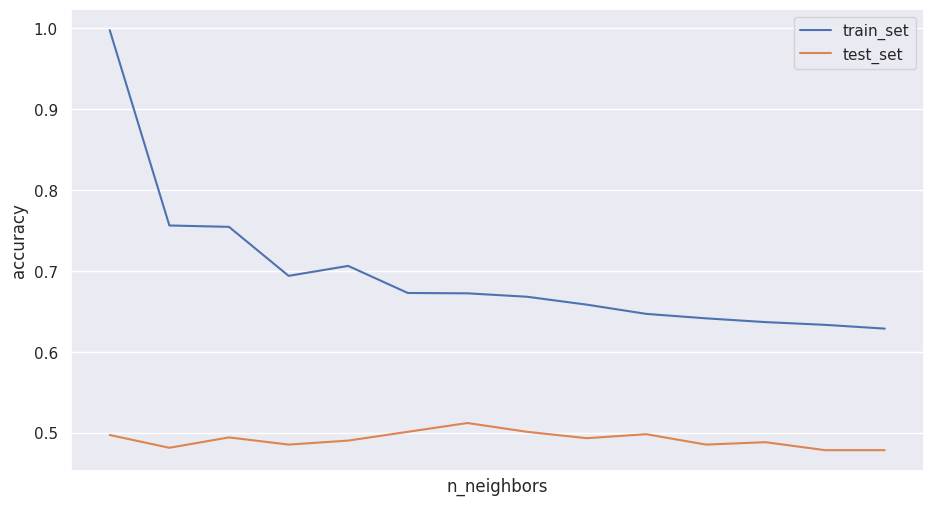

In [ ]:
plt.figure(figsize = (11,6))
plt.plot(range(1,15),train_acc,label = 'train_set')
plt.plot(range(1,15),test_acc,label = 'test_set')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.xticks(np.arange(0,16,step = -1))
plt.legend()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train,Y_train)
accuracy_train = accuracy_score(Y_train,knn.predict(X_train))
accuracy_test = accuracy_score(Y_test,knn.predict(X_test))
print(f'훈련정확도 : {accuracy_train: 0.2f}')
# print(f'훈련정확도 : {accuracy_train:.2f}')
print(f'테스트정확도 : {accuracy_test: 0.2f}')

훈련정확도 :  0.64
테스트정확도 :  0.49


### (5) 데이터

In [ ]:
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

## Ⅶ. 금융에서의 딥러닝

In [ ]:
len(np.random.randint(2,size = (1000,1)))

1000

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(12, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### (1) CNN을 활용한 캔들차트 예측분석

In [ ]:
def createLabel(fname,seq_len):
  print("Creating Label...")
  filename = fname.split('/')
  removeOutput(f"{filename[1][:-4]}._label_{seq_len}.txt")
  df = pd.read_csv(fname,parse_dates = True,index_col = 0)
  df = df.fillna(0)

  df = df.reset_index()
  df['Date'] = df['date'].map(mdates.date2num)
  for i in range(0,len(df)):
    c = df.iloc[i:i+int(seq_len),:]
    starting = 0
    endvalue = 0
    label = ''

    if len(c) == int(seq_len+1):
      starting = c["Open"].iloc[-1]
      endvalue = c["Close"].iloc[-1]
      tmp_rtn = endvalue / starting -1

      if tmp_rtn > 0:
        label = 1
      else:
        label = 0
      with open(f'{filename[1][:-4]}_label_{seq_len}',"a") as the_file:
        the_file.write(f'{filename[1][:-4]}-{i},{label}')
        the_file.write('\n')
  print("Create Label finished")